# Career Foundry Exercise 4.10
- Remove PII fields
- Add in a region column
- Analyze price point by region
- Remove customers with fewer than 5 orders
- Add derived columns for  age, income, certain goods in the “department_id” column, and number of dependents
- Create visualizations
- Aggregate variables

In [47]:
#remember to import everytime you open a new notebook
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [49]:
# create a path
path = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Python\Python Data Set'

In [51]:
# create a path for the final project
path_client = r'C:\Users\laura\Documents\Continuting Education\Career Foundry\Python\Instacart Basket Analysis'

## Question 1 - Import the Latest Data set

In [54]:
#import the latest data frame
ords_prods_customers = pd.read_pickle(os.path.join(path, 'Prepared Data', '4.9_data_viz', 'ords_prods_customers.pkl'))

In [55]:
#rename columns
ords_prods_customers.rename(columns={'First Name': 'first_name'}, inplace=True)
ords_prods_customers.rename(columns={'Last_Name': 'last_name'}, inplace=True)
ords_prods_customers.rename(columns={'Gender': 'gender'}, inplace=True)
ords_prods_customers.rename(columns={'STATE': 'state'}, inplace=True)
ords_prods_customers.rename(columns={'Age': 'age'}, inplace=True)
ords_prods_customers.rename(columns={'Dependant_Count': 'dependant_count'}, inplace=True)

## Question 2 - Consider the latest security and PII implications

In [61]:
# check all columns in the dataframe
column_names = ords_prods_customers.columns.tolist()
print(column_names)

['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'busiest_day', 'busiest_hours', 'max_order', 'loyalty_flag', 'avg_product_order', 'spender_flag', 'med_days_since_order', 'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'dependant_count', 'fam_status', 'income']


In [65]:
ords_prods_customers.shape

(32404859, 30)

In [67]:
#Since the customer’s name, location, and income exist in the same dataframe, this could be sufficient to identify an individual and
#possibly reveal private information, such as their income. To maintain privacy, I will remove the customer’s name from the dataframe.
#Dropping this information will not adversely impact the analysis.

In [69]:
ords_prods_customers.drop(['first_name', 'last_name'], axis=1, inplace=True)


In [70]:
ords_prods_customers.shape

(32404859, 28)

## Question 3 (A) - Create a regional segment for the data

In [74]:
## Add in a region column to the data frame
ords_prods_customers.loc[ords_prods_customers['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey', 'Maine']), 'region'] = 'Northeast'

In [76]:
ords_prods_customers.loc[ords_prods_customers['state'].isin(['Michigan', 'Wisconsin', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Michigan']), 'region'] = 'Midwest'

In [78]:
ords_prods_customers.loc[ords_prods_customers['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', ' Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Delaware', 'Kentucky']), 'region'] = 'South'

In [80]:
ords_prods_customers.loc[ords_prods_customers['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii', 'Idaho']), 'region'] = 'West'

In [82]:
ords_prods_customers.shape

(32404859, 29)

## Question 3 (B) - Is there a regional difference in spending habbits

In [85]:
#first put region and prices in a crosstab
crosstab_prices_region = pd.crosstab(ords_prods_customers['region'], ords_prods_customers['prices'], dropna = False)

In [87]:
crosstab_prices_region.to_clipboard()

Text(0, 0.5, 'Price')

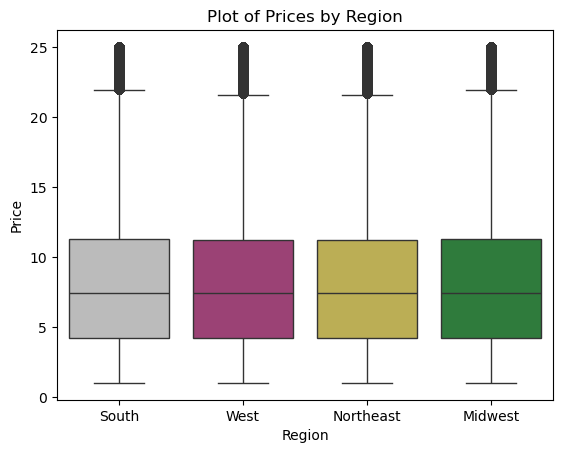

In [89]:
#The crosstab will be included in the final analysis, however, I believe the best way to show the regional price
# differences is with a box plot 

region_price_plot = sns.boxplot(x='region', y='prices', data=ords_prods_customers, hue = 'region', palette={'South': '#bbbbbb','West': '#aa3377','Northeast': '#ccbb44','Midwest': '#228833'})
plt.title('Plot of Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price')

In [91]:
# when viewed this way there is very little regional variation in prices.

In [93]:
#export visualization to final project
region_price_plot.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'region_price_plot.png') , bbox_inches = 'tight')

## Question 4 - Create an exclusion flag for low-activity customers


In [96]:
ords_prods_customers.loc[(ords_prods_customers['max_order'] <= 4), 'activity_flag'] = 'low activity customer'

In [98]:
ords_prods_customers.loc[(ords_prods_customers['max_order'] >= 5), 'activity_flag'] = 'regular activity customer'

In [100]:
ords_prods_customers.shape

(32404859, 30)

In [104]:
#create a data frame with the target customer list and export it. This list will be used going forward
ords_prods_customers_target = ords_prods_customers[ords_prods_customers['activity_flag'] == 'regular activity customer']

In [106]:
ords_prods_customers_target.shape

(30964564, 30)

In [108]:
#export the data frame to the project file
ords_prods_customers_target.to_pickle(os.path.join(path_client,'Data', 'ords_prods_customers_target.pkl'))

In [110]:
#delete the original data frame as it is no longer needed
del ords_prods_customers

## Question 5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [113]:
#age
ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 18) & (ords_prods_customers_target['age'] <= 24) , 'age_cohort'] = '18 - 24'
ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 25) & (ords_prods_customers_target['age'] <= 34) , 'age_cohort'] = '25 - 34'
ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 35) & (ords_prods_customers_target['age'] <= 44) , 'age_cohort'] = '35 - 44'
ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 45) & (ords_prods_customers_target['age'] <= 54) , 'age_cohort'] = '45 - 54'
ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 55) & (ords_prods_customers_target['age'] <= 64) , 'age_cohort'] = '55 - 64'
ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 65),'age_cohort'] = '65+'

C:\Users\laura\AppData\Local\Temp\ipykernel_16868\3222719593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_target.loc[(ords_prods_customers_target['age'] > 18) & (ords_prods_customers_target['age'] <= 24) , 'age_cohort'] = '18 - 24'


In [115]:
ords_prods_customers_target.shape

(30964564, 31)

In [117]:
#income
ords_prods_customers_target.loc[(ords_prods_customers_target['income'] < 50000), 'income_range'] = 'low income'
ords_prods_customers_target.loc[(ords_prods_customers_target['income'] > 50000) & (ords_prods_customers_target['income'] <= 100000), 'income_range'] = 'lower middle income'
ords_prods_customers_target.loc[(ords_prods_customers_target['income'] > 100000) & (ords_prods_customers_target['income'] <= 200000), 'income_range'] = 'upper middle income'
ords_prods_customers_target.loc[(ords_prods_customers_target['income'] > 200000), 'income_range'] = 'upper income'

C:\Users\laura\AppData\Local\Temp\ipykernel_16868\3274672453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_target.loc[(ords_prods_customers_target['income'] < 50000), 'income_range'] = 'low income'


In [119]:
ords_prods_customers_target.shape

(30964564, 32)

In [121]:
# categorize department ID
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([10])), 'department_type'] = 'restaurant'
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([3,14,20])), 'department_type'] = 'prepared'
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([2,21])), 'department_type'] = 'not specified'
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([8,11,17,18])), 'department_type'] = 'non-grocery'
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([1,6,9,13,15,19])), 'department_type'] = 'grocery'
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([5,7])), 'department_type'] = 'beverages'
ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([4,12,16])), 'department_type'] = 'perishable'

C:\Users\laura\AppData\Local\Temp\ipykernel_16868\4027769117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_target.loc[(ords_prods_customers_target['department_id'].isin([10])), 'department_type'] = 'restaurant'


In [122]:
ords_prods_customers_target.shape

(30964564, 33)

In [125]:
ords_prods_customers_target.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,dependant_count,fam_status,income,region,activity_flag,age_cohort,income_range,department_type
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,regular activity customer,25 - 34,low income,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,South,regular activity customer,25 - 34,low income,perishable
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,regular activity customer,25 - 34,low income,grocery
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,South,regular activity customer,25 - 34,low income,grocery
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,31,2/17/2019,3,married,40423,South,regular activity customer,25 - 34,low income,non-grocery


In [127]:
# dependents
ords_prods_customers_target.loc[(ords_prods_customers_target['dependant_count'] < 1), 'family_type'] = 'does not have children'
ords_prods_customers_target.loc[(ords_prods_customers_target['dependant_count'] >= 1), 'family_type'] = 'has children'

C:\Users\laura\AppData\Local\Temp\ipykernel_16868\3119472928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_customers_target.loc[(ords_prods_customers_target['dependant_count'] < 1), 'family_type'] = 'does not have children'


In [129]:
ords_prods_customers_target.shape

(30964564, 34)

## Question 6 - create visualizations to show distributions of profiles.

In [132]:
#create a pie chart for the age range
# put the results into their own data frame pre-grouped first
pie_age_range_df = ords_prods_customers_target.groupby(['age_cohort']).count()['order_id']

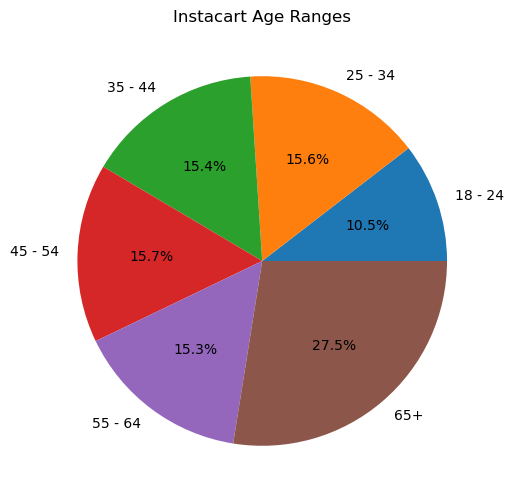

In [158]:
pie_age_range_chart, ax = plt.subplots(figsize=(6, 6))

ax.pie(pie_age_range_df, labels=pie_age_range_df.index, autopct='%1.1f%%')
ax.set_title('Instacart Age Ranges')

pie_age_range_chart.savefig('pie_age_range_chart.png')

plt.show()

In [160]:
#export the chart
pie_age_range_chart.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'pie_age_range_chart.png'))

In [164]:
#customers 65+ are instacarts most frequent users

In [166]:
#Dependent analysis, because there are aonly two outcomes I will put this into a pie cart
# put the results into their own data frame pre-grouped first
pie_dependant_df = ords_prods_customers_target.groupby(['family_type']).count()['order_id']


In [168]:
pie_dependant_df.head

<bound method NDFrame.head of family_type
does not have children     7739681
has children              23224883
Name: order_id, dtype: int64>

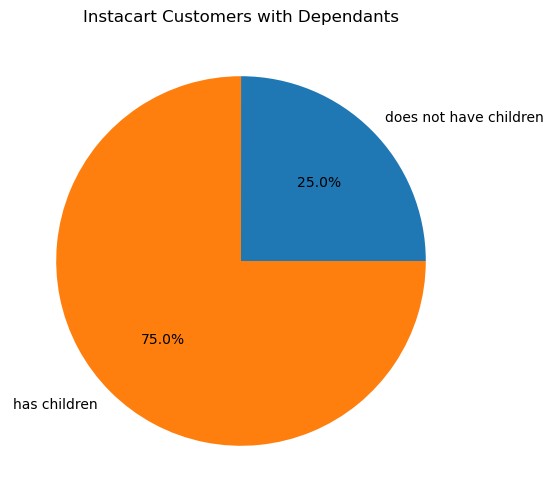

In [170]:
pie_dependant_chart, ax = plt.subplots(figsize=(6, 6))

ax.pie(pie_dependant_df, labels=pie_dependant_df.index, autopct='%1.1f%%')
ax.set_title('Instacart Customers with Dependants')

pie_age_range_chart.savefig('pie_dependant_chart.png')

plt.show()

In [172]:
#the majority of instacarts customers do not have children

In [174]:
#export the chart
pie_dependant_chart.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'pie_dependant_chart.png') , bbox_inches = 'tight')

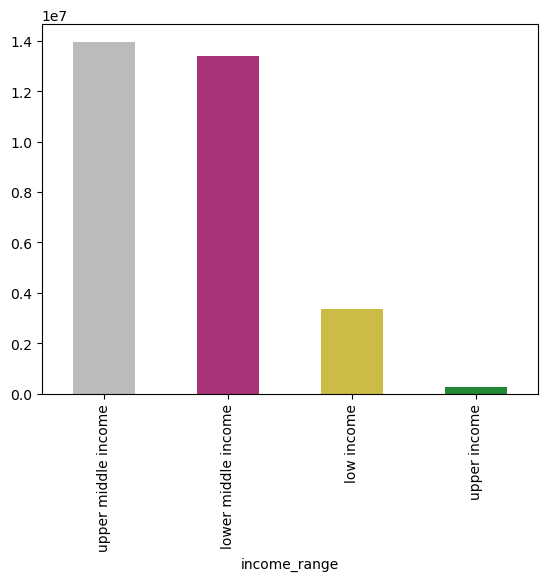

In [176]:
#create a bar chart with income range
#add color
income_bar = ords_prods_customers_target['income_range'].value_counts().sort_values(ascending=False).plot.bar(color = ['#bbbbbb', '#aa3377', '#ccbb44','#228833'])

In [178]:
#results - the upper and middle income customers are instacarts best customer

In [180]:
#export the chart
income_bar.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'bar_income.png'), bbox_inches = 'tight')

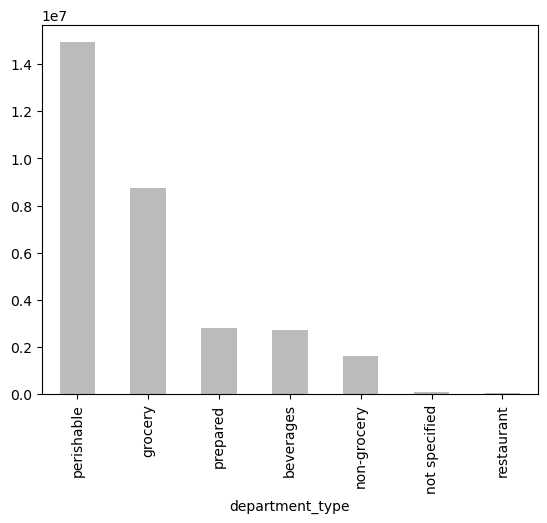

In [182]:
#analyze department type
department_bar = ords_prods_customers_target['department_type'].value_counts().sort_values(ascending=False).plot.bar(color = ['#bbbbbb'])

In [184]:
# perishable goods are Instacarts most popular product

## Question 7 :Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [187]:
cust_mean_min_mean = ords_prods_customers_target.groupby('user_id').agg({'prices': ['max', 'min', 'mean'], 'order_number': ['max', 'min', 'mean']})

In [189]:
cust_mean_min_mean.head()

prices                order_number              
           max  min      mean          max min      mean
user_id                                                 
1         14.0  1.0  6.367797           10   1  5.813559
2         14.8  1.3  7.515897           14   1  8.035897
3         14.4  1.3  8.197727           12   1  6.000000
4         14.6  1.4  8.205556            5   1  2.888889
7         23.2  1.1  7.466990           20   1  9.645631

In [191]:
#export data for further analysis with will the placed in the crosstab folder in the final analysis
cust_mean_min_mean.to_clipboard()

## Question 8 - Compare customer profiles across regions and departments

In [194]:
customer_region_crosstab = pd.crosstab(ords_prods_customers_target['region'], ords_prods_customers_target['department_type'], dropna = False )

In [196]:
customer_region_crosstab.head()

department_type,beverages,grocery,non-grocery,not specified,perishable,prepared,restaurant
region,,,,,,,
Midwest,633022,2055290,384489,23546,3504865,652372,7929
Northeast,487946,1541752,289815,17780,2626191,495602,5599
South,908232,2913360,541977,33366,4974612,928412,11180
West,687328,2250641,411334,24487,3825568,719126,8743


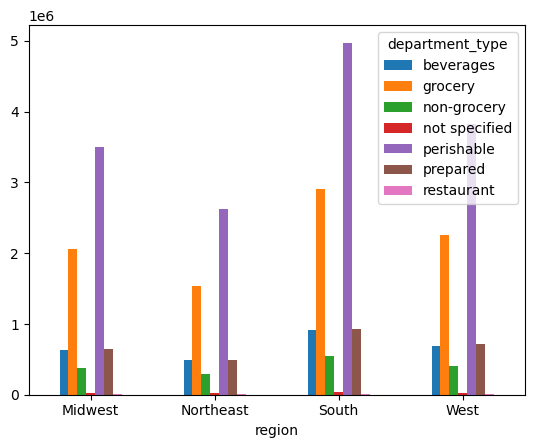

In [198]:
#compare with a bar chart
customer_region_barchart = customer_region_crosstab.plot.bar(rot=0)

In [200]:
# The data shows that while there are regional differences in total spend by deaprtment the order in which regions buy productes is still the same

In [202]:
#export the chart
customer_region_barchart.figure.savefig(os.path.join(path_client,  'Analysis', 'Visualizations', 'customer_region_barchart.png'))

In [204]:
#export the data so that it can be used for the second part of the final project
ords_prods_customers_target.to_pickle(os.path.join(path,'Prepared Data', '4.10_final', 'ords_prods_customers_target'))